In [248]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [249]:
data = pd.read_csv('ex1data1.txt',header=-1);

In [250]:
data.columns = ['x', 'y']

In [251]:
X= data.x
y= data.y

In [252]:
m = len(X)

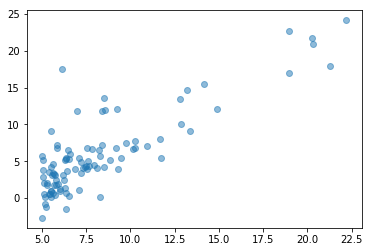

In [253]:
plt.scatter(X, y, alpha=0.5)
plt.show()

In [254]:
x0 = np.ones(m);

In [255]:
data = {'X0':x0,'X1':X}
X = pd.DataFrame(data)

In [264]:
def costFun(X,y,theta):
    m = len(y);
    X =X.values;
    y = y.values.reshape(97,1);
    hyp = X.dot(theta);
    diff = hyp-y;
    sqr = np.sum(np.square(diff))/(2*len(y));
    return sqr;

In [265]:
r = costFun(X,y,np.array([[-1], [2]]));
r

54.24245508201238

In [266]:
def gradientDescent(X, y, theta, alpha, num_iters):
    m = len(y);
    X =X.values;
    y = y.values.reshape(97,1);
    for i  in range(0,num_iters):
        hyp = X.dot(theta);
        theta = theta - (alpha/m) * X.transpose().dot(hyp-y);
    return theta;

In [267]:
theta = gradientDescent(X, y, np.array([[0], [0]]), 0.01, 1500);

In [268]:
theta

array([[-3.63029144],
       [ 1.16636235]])

In [274]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);


In [275]:
J_vals = np.zeros(shape=(len(theta0_vals),len(theta1_vals)))

In [279]:
for i in range(0,len(theta0_vals)):
    for j in range(0,len(theta1_vals)):
        theta = np.array([[theta0_vals[i]], [theta1_vals[j]]]);
        J_vals[i,j] = costFun(X, y, theta );

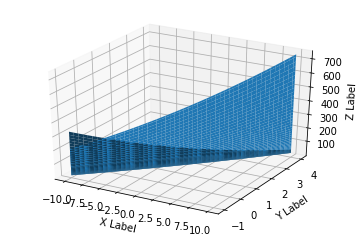

In [280]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals.transpose())

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
plt.show()

In [286]:
help(plt.contour)

Help on function contour in module matplotlib.pyplot:

contour(*args, **kwargs)
    Plot contours.
    
    Call signature::
    
        contour([X, Y,] Z, [levels], **kwargs)
    
    :func:`~matplotlib.pyplot.contour` and
    :func:`~matplotlib.pyplot.contourf` draw contour lines and
    filled contours, respectively.  Except as noted, function
    signatures and return values are the same for both versions.
    
    
    Parameters
    ----------
    X, Y : array-like, optional
        The coordinates of the values in *Z*.
    
        *X* and *Y* must both be 2-D with the same shape as *Z* (e.g.
        created via :func:`numpy.meshgrid`), or they must both be 1-D such
        that ``len(X) == M`` is the number of columns in *Z* and
        ``len(Y) == N`` is the number of rows in *Z*.
    
        If not given, they are assumed to be integer indices, i.e.
        ``X = range(M)``, ``Y = range(N)``.
    
    Z : array-like(N, M)
        The height values over which the contour is 

ValueError: Contour levels must be increasing

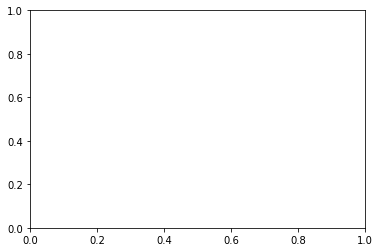

In [285]:
plt.contour([theta0_vals,theta1_vals],J_vals.transpose())